In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import geopandas as gpd
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Determining paths to project data
BASE_PATH_TO_FOLDER = input("Please provide the path to the root folder of this project: ")
CSV_KANGLE = BASE_PATH_TO_FOLDER + "/data/raw/Portland Crime Data Raw.csv"
CSV_PPB = BASE_PATH_TO_FOLDER + "/data/raw/CrimeData-2023.csv"

In [7]:
# Creating initial dataframes
df_kaggle = pd.read_csv(CSV_KANGLE, sep='\t')
df_ppb = pd.read_csv(CSV_PPB)

In [9]:
# Overview of kaggle data
df_kaggle.head()

,Unnamed: 0,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
0,131141,700 BLOCK OF SW KING AVE,24-933461,Property,Goose Hollow,2024-12-31,835,Larceny Offenses,All Other Larceny,45.522619,-122.695457,7639475.0,684279.0,2024-12-31,1
1,144335,2500 BLOCK OF NE MARTIN LUTHER KING JR BLVD,24-333349,Property,Eliot,2024-12-31,1815,Burglary,Burglary,45.540665,-122.661543,7648340.0,690622.0,2024-12-31,1
2,137002,1500 BLOCK OF N FLINT AVE,24-333656,Property,Lloyd,2024-12-31,1900,Larceny Offenses,Theft of Motor Vehicle Parts or Accessories,45.534075,-122.668690,7646445.0,688269.0,2024-12-31,1
3,124540,NaN,24-X6019097,Person,Sumner,2024-12-31,1740,Homicide Offenses,Murder and Non-negligent Manslaughter,NaN,NaN,NaN,NaN,2024-12-31,1
4,130216,600 BLOCK OF SW PARK AVE,24-933457,Property,Downtown,2024-12-31,1020,Larceny Offenses,Theft From Motor Vehicle,45.519952,-122.680464,7643290.0,683203.0,2024-12-31,1


In [11]:
# Overview of PPB data
df_ppb.head()

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
0,NaN,23-X5791168,Person,Arbor Lodge,1/1/2023,246,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,1/1/2023,1
1,NaN,23-X5791169,Person,Old Town/Chinatown,1/1/2023,209,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,1/1/2023,1
2,NaN,23-X5791249,Person,Montavilla,1/1/2023,1133,Assault Offenses,Aggravated Assault,NaN,NaN,NaN,NaN,1/1/2023,1
3,NaN,23-X5791249,Society,Montavilla,1/1/2023,1133,Weapon Law Violations,Weapons Law Violations,NaN,NaN,NaN,NaN,1/1/2023,1
4,NaN,23-X5791250,Person,Creston-Kenilworth,1/1/2023,649,Assault Offenses,Aggravated Assault,NaN,NaN,NaN,NaN,1/1/2023,1


In [13]:
# Setting column name for unique identifier in df_kaggle
df_kaggle = df_kaggle.rename(columns = {'Unnamed: 0': 'ID'})

In [15]:
# Converting date columns into datetime types
for col in ['OccurDate', 'ReportDate']:
    df_ppb[col] = pd.to_datetime(df_ppb[col], errors='coerce').dt.strftime('%Y-%m-%d')
    df_kaggle[col] = pd.to_datetime(df_kaggle[col], errors='coerce').dt.strftime('%Y-%m-%d')

In [17]:
# Creating a subset of df_ppb which contains the data for the missing months in df_kaggle
df_ppb_subset_missing = df_ppb[(df_ppb['ReportDate'] >= '2023-08-01') & (df_ppb['ReportDate'] <= '2023-12-31')]

In [19]:
# Setting a starting point for the unique id in df_ppb data that will be merged with the data from df_kaggle
starting_id = df_kaggle['ID'].max() + 1
df_ppb_subset_missing = df_ppb_subset_missing.copy()
df_ppb_subset_missing['ID'] = range(starting_id, starting_id + len(df_ppb_subset_missing))

In [21]:
# Merging the dataframes into a new dataframe that contains all data
df = pd.concat([df_kaggle, df_ppb_subset_missing], ignore_index=True)

In [23]:
# Overview of dataframe created from previous merger
df.head()

,ID,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
0,131141,700 BLOCK OF SW KING AVE,24-933461,Property,Goose Hollow,2024-12-31,835,Larceny Offenses,All Other Larceny,45.522619,-122.695457,7639475.0,684279.0,2024-12-31,1
1,144335,2500 BLOCK OF NE MARTIN LUTHER KING JR BLVD,24-333349,Property,Eliot,2024-12-31,1815,Burglary,Burglary,45.540665,-122.661543,7648340.0,690622.0,2024-12-31,1
2,137002,1500 BLOCK OF N FLINT AVE,24-333656,Property,Lloyd,2024-12-31,1900,Larceny Offenses,Theft of Motor Vehicle Parts or Accessories,45.534075,-122.668690,7646445.0,688269.0,2024-12-31,1
3,124540,NaN,24-X6019097,Person,Sumner,2024-12-31,1740,Homicide Offenses,Murder and Non-negligent Manslaughter,NaN,NaN,NaN,NaN,2024-12-31,1
4,130216,600 BLOCK OF SW PARK AVE,24-933457,Property,Downtown,2024-12-31,1020,Larceny Offenses,Theft From Motor Vehicle,45.519952,-122.680464,7643290.0,683203.0,2024-12-31,1


In [31]:
# Using Geopandas to create a zipcode range based on coordinate data
zip_gdf = gpd.read_file(f'{BASE_PATH_TO_FOLDER}\\data\\supplemental\\ZIP_Codes.shp')
crime_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['OpenDataLon'], df['OpenDataLat']),
    crs="EPSG:4326"
)
zip_gdf = zip_gdf.to_crs(crime_gdf.crs)
crime_with_zip = gpd.sjoin(crime_gdf, zip_gdf[['ZIPCODE', 'geometry']], how='left', predicate='within')
zip_data = crime_with_zip[['ID', 'ZIPCODE']]
df = df.merge(zip_data, on='ID', how='left')

In [33]:
# Observing the new Zipcode column
df.head()

,ID,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount,ZIPCODE
0,131141,700 BLOCK OF SW KING AVE,24-933461,Property,Goose Hollow,2024-12-31,835,Larceny Offenses,All Other Larceny,45.522619,-122.695457,7639475.0,684279.0,2024-12-31,1,97205
1,144335,2500 BLOCK OF NE MARTIN LUTHER KING JR BLVD,24-333349,Property,Eliot,2024-12-31,1815,Burglary,Burglary,45.540665,-122.661543,7648340.0,690622.0,2024-12-31,1,97212
2,137002,1500 BLOCK OF N FLINT AVE,24-333656,Property,Lloyd,2024-12-31,1900,Larceny Offenses,Theft of Motor Vehicle Parts or Accessories,45.534075,-122.668690,7646445.0,688269.0,2024-12-31,1,97227
3,124540,NaN,24-X6019097,Person,Sumner,2024-12-31,1740,Homicide Offenses,Murder and Non-negligent Manslaughter,NaN,NaN,NaN,NaN,2024-12-31,1,NaN
4,130216,600 BLOCK OF SW PARK AVE,24-933457,Property,Downtown,2024-12-31,1020,Larceny Offenses,Theft From Motor Vehicle,45.519952,-122.680464,7643290.0,683203.0,2024-12-31,1,97205


In [35]:
# During the previous zipcode merge, some duplicates were created where previously none existed. 
# This occurred due to lat/lon coordinates which were on the border of 2 zipcodes and so the merge created a field
# for each scenario
print("ID uniqueness:", df['ID'].is_unique)

ID uniqueness: False


In [39]:
# It can be observed here that each item which has a duplicate ID is the same except for the zipcode
# It may have been worthwhile to analyze each of these and determine an appropriate location for them but the
# amount of data it will effect is minimal for my purposes, so I am simply dropping any repeats arbitrarily
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[df.duplicated(subset='ID', keep=False)])

,ID,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount,ZIPCODE
2629,164967,9900 BLOCK OF E BURNSIDE ST,24-318771,Person,Hazelwood,2024-12-14,1148,Assault Offenses,Simple Assault,45.522794,-122.561589,7673775.0,683439.0,2024-12-14,1,97216
2630,164967,9900 BLOCK OF E BURNSIDE ST,24-318771,Person,Hazelwood,2024-12-14,1148,Assault Offenses,Simple Assault,45.522794,-122.561589,7673775.0,683439.0,2024-12-14,1,97220
109737,390590,9900 BLOCK OF E BURNSIDE ST,22-269805,Property,Hazelwood,2022-10-07,2030,Vandalism,Vandalism,45.522794,-122.561589,7673775.0,683439.0,2022-10-07,1,97216
109738,390590,9900 BLOCK OF E BURNSIDE ST,22-269805,Property,Hazelwood,2022-10-07,2030,Vandalism,Vandalism,45.522794,-122.561589,7673775.0,683439.0,2022-10-07,1,97220
130802,390589,9900 BLOCK OF E BURNSIDE ST,22-163046,Property,Hazelwood,2022-06-18,1900,Motor Vehicle Theft,Motor Vehicle Theft,45.522794,-122.561589,7673775.0,683439.0,2022-06-18,1,97216
130803,390589,9900 BLOCK OF E BURNSIDE ST,22-163046,Property,Hazelwood,2022-06-18,1900,Motor Vehicle Theft,Motor Vehicle Theft,45.522794,-122.561589,7673775.0,683439.0,2022-06-18,1,97220
149707,375125,4300 BLOCK OF N WILLAMETTE BLVD,22-69262,Property,University Park,2022-03-14,1812,Vandalism,Vandalism,45.575298,-122.711767,7635822.0,703593.0,2022-03-14,1,97217
149708,375125,4300 BLOCK OF N WILLAMETTE BLVD,22-69262,Property,University Park,2022-03-14,1812,Vandalism,Vandalism,45.575298,-122.711767,7635822.0,703593.0,2022-03-14,1,97203
179132,269889,4300 BLOCK OF N WILLAMETTE BLVD,21-292961,Property,University Park,2021-10-20,207,Vandalism,Vandalism,45.575298,-122.711767,7635822.0,703593.0,2021-10-20,1,97217
179133,269889,4300 BLOCK OF N WILLAMETTE BLVD,21-292961,Property,University Park,2021-10-20,207,Vandalism,Vandalism,45.575298,-122.711767,7635822.0,703593.0,2021-10-20,1,97203


In [41]:
# Dropping the duplicate rows and confirming that it was successful
df = df.drop_duplicates(subset='ID', keep='first')
print("ID uniqueness:", df['ID'].is_unique)

ID uniqueness: True


In [43]:
# Creating a few additional rows for some other potential analysis of datetime data
df['ReportDate'] = pd.to_datetime(df['ReportDate'], errors='coerce')
df['OccurDate'] = pd.to_datetime(df['OccurDate'], errors='coerce')
df['OccurTime'] = pd.to_datetime(df['OccurTime'].astype(str).str.zfill(4), format='%H%M').dt.time
df['OccurDateTime'] = pd.to_datetime(df['OccurDate'].astype(str) + ' ' + df['OccurTime'].astype(str))
df['OccurHour'] = df['OccurDateTime'].dt.hour

In [59]:
# Observing total OffenseCategory data
df['OffenseCategory'].value_counts(sort=True)

OffenseCategory
Larceny Offenses                236802
Vandalism                        76174
Assault Offenses                 75575
Motor Vehicle Theft              69143
Burglary                         45182
Fraud Offenses                   35974
Drug/Narcotic Offenses           11218
Robbery                          10745
Weapon Law Violations             6996
Sex Offenses                      5857
Counterfeiting/Forgery            5295
Arson                             3155
Prostitution Offenses             1482
Embezzlement                       911
Stolen Property Offenses           754
Kidnapping/Abduction               664
Pornography/Obscene Material       559
Homicide Offenses                  489
Animal Cruelty Offenses            325
Extortion/Blackmail                293
Human Trafficking Offenses         237
Bribery                             18
Gambling Offenses                    1
Name: count, dtype: int64

In [61]:
# Observing total OffenseType data
df['OffenseType'].value_counts(sort=True)

OffenseType
Theft From Motor Vehicle                       90132
Vandalism                                      76174
Motor Vehicle Theft                            69143
All Other Larceny                              62491
Burglary                                       45182
Simple Assault                                 43466
Shoplifting                                    43408
Theft of Motor Vehicle Parts or Accessories    22304
Aggravated Assault                             21148
Theft From Building                            15859
Identity Theft                                 14227
False Pretenses/Swindle/Confidence Game        12910
Drug/Narcotic Violations                       11162
Intimidation                                   10961
Robbery                                        10745
Credit Card/ATM Fraud                           7769
Weapons Law Violations                          6996
Counterfeiting/Forgery                          5295
Arson                             

In [63]:
# Observing the column list and types of data currently in each column
df.dtypes

ID                          int64
Address                    object
CaseNumber                 object
CrimeAgainst               object
Neighborhood               object
OccurDate          datetime64[ns]
OccurTime                  object
OffenseCategory            object
OffenseType                object
OpenDataLat               float64
OpenDataLon               float64
OpenDataX                 float64
OpenDataY                 float64
ReportDate         datetime64[ns]
OffenseCount                int64
ZIPCODE                    object
OccurDateTime      datetime64[ns]
OccurHour                   int32
dtype: object

In [ ]:
# Exporting the data to a .csv
df.to_csv(f"{BASE_PATH_TO_FOLDER}data/processed/Portland Crime Data with Zipcode Cleaned.csv", index=False)

In [ ]:
# Observing the data in a variety of ways from here on out to get an idea of what is worth exploring

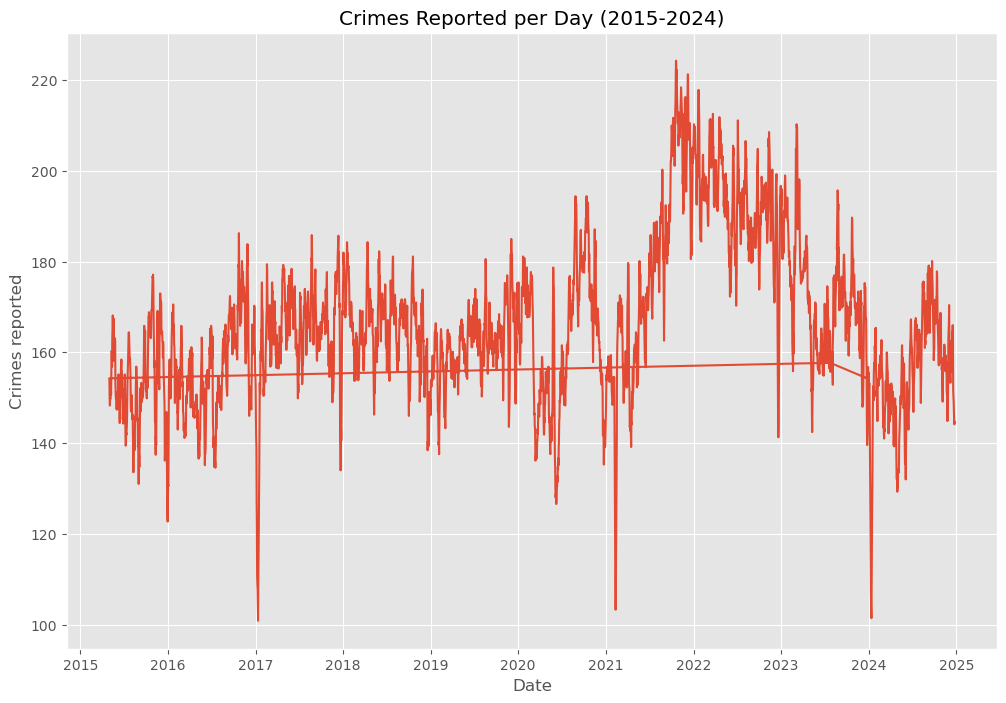

In [45]:
# A graph depictiong the total amounts of crime that were reported per day total
report_date_freqency = df['ReportDate'].value_counts(sort=False)
rolling_average = report_date_freqency.rolling(window=7).mean()
plt.plot(rolling_average.index, rolling_average.values)
plt.title('Crimes Reported per Day (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Crimes reported')
plt.show()

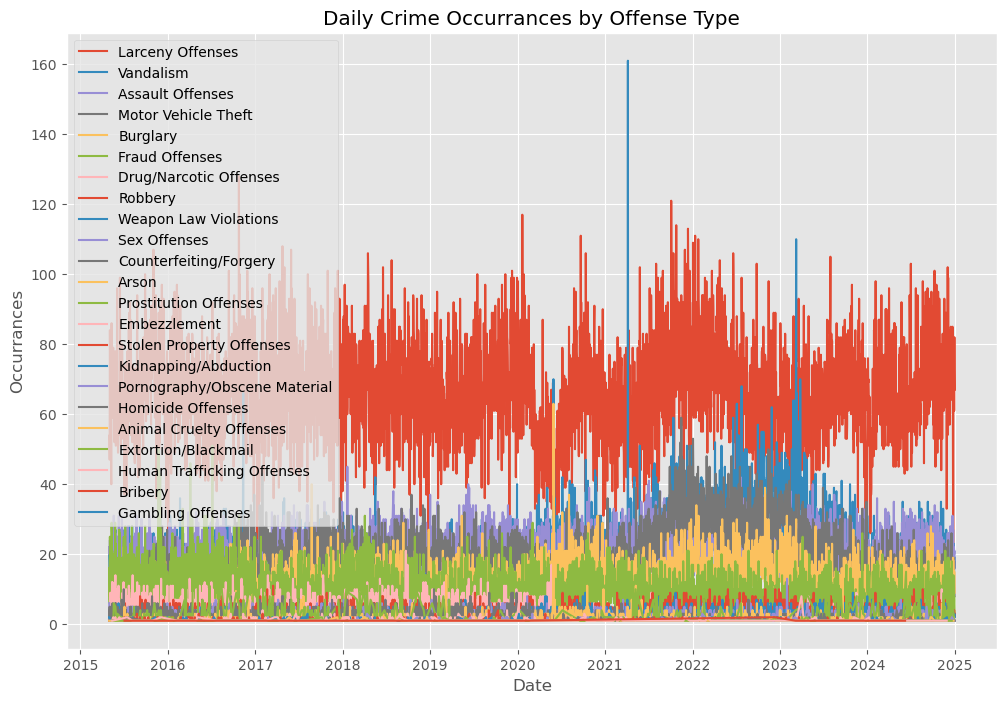

In [47]:
# A graph depictiong the breakdown of offence categories of occurred crimes per day (2015-2024)
# Note: Ignoring crimes which occurred prior to 2015
df['OccurDate'] = pd.to_datetime(df['OccurDate'], errors='coerce')
df_trimmed = df[(df['OccurDate'] >= '2015-01-01') & (df['OccurDate'] <= '2024-12-31')]
for offense in df_trimmed['OffenseCategory'].value_counts().index:
    daily_counts = df_trimmed[df_trimmed['OffenseCategory'] == offense].groupby('OccurDate').size()
    plt.plot(daily_counts.index, daily_counts.values, label=offense)
plt.title("Daily Crime Occurrances by Offense Type")
plt.xlabel("Date")
plt.ylabel("Occurrances")
plt.legend()
plt.grid(True)
plt.show()

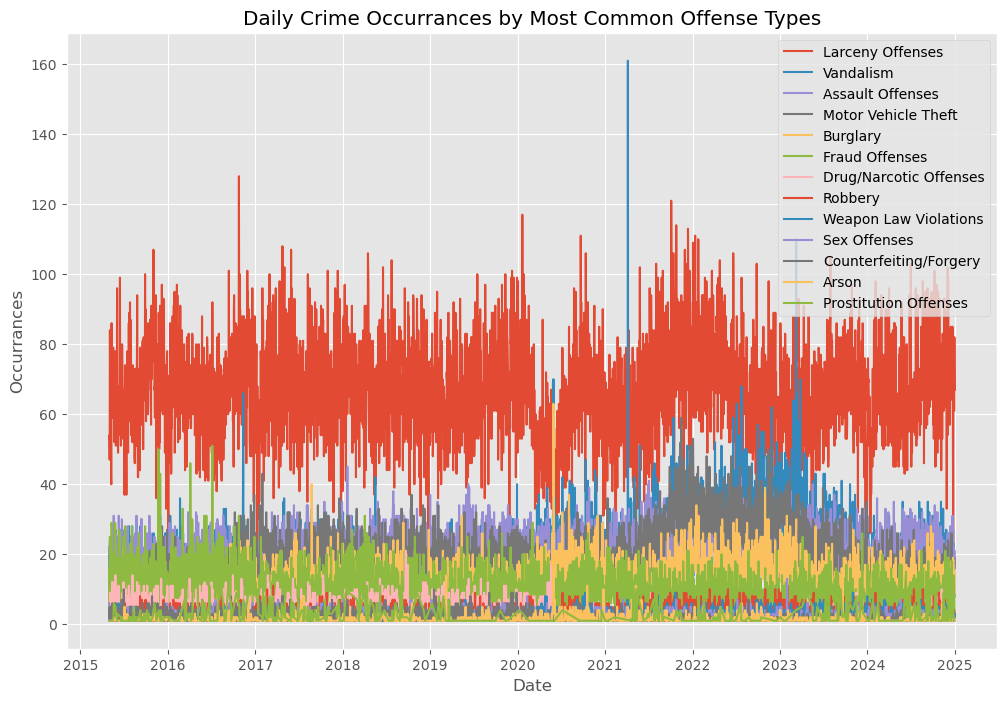

In [49]:
# A graph depictiong the breakdown of offence categories of occurred crimes per day where the total occurances > 1000 (2015-2024)
# Note: Ignoring crimes which occurred prior to 2015
df_trimmed = df[(df['OccurDate'] >= '2015-01-01') & (df['OccurDate'] <= '2024-12-31')]
common_offenses = df_trimmed['OffenseCategory'].value_counts()[df_trimmed['OffenseCategory'].value_counts() > 1000].index.tolist()
for offense in common_offenses:
    daily_counts = df_trimmed[df_trimmed['OffenseCategory'] == offense].groupby('OccurDate').size()
    plt.plot(daily_counts.index, daily_counts.values, label=offense)
plt.title("Daily Crime Occurrances by Most Common Offense Types")
plt.xlabel("Date")
plt.ylabel("Occurrances")
plt.legend()
plt.grid(True)
plt.show()

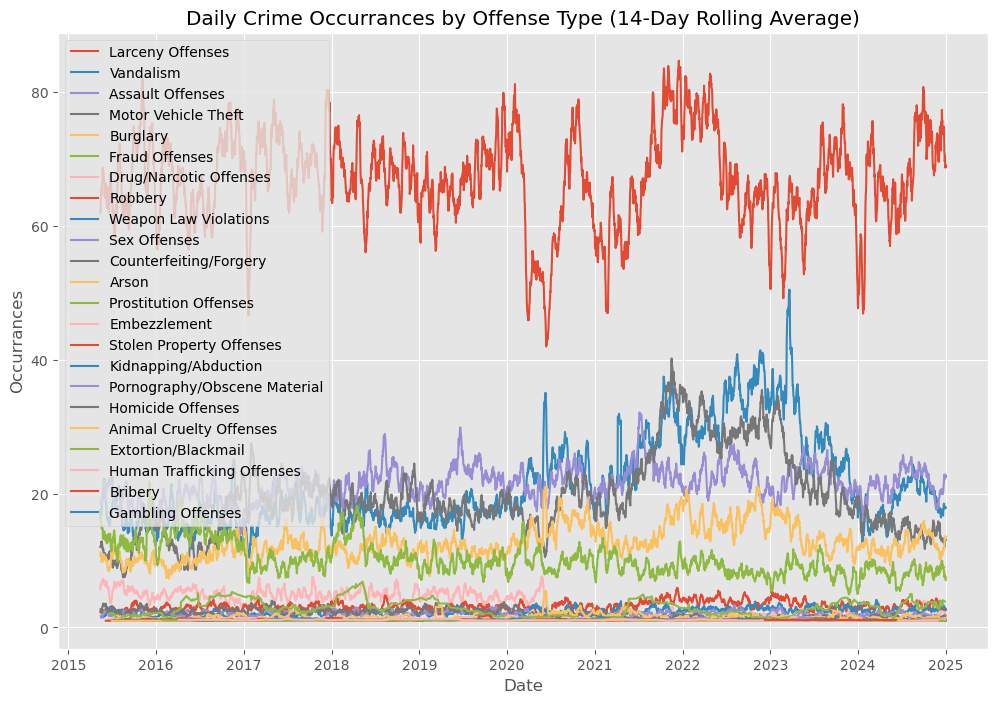

In [51]:
# A graph depictiong the breakdown of offence categories of occurred crimes per day using a 14-Day Rolling Average (2015-2024)
# Note: Ignoring crimes which occurred prior to 2015
df_trimmed = df[(df['OccurDate'] >= '2015-01-01') & (df['OccurDate'] <= '2024-12-31')]
for offense in df_trimmed['OffenseCategory'].value_counts().index:
    daily_counts = df_trimmed[df_trimmed['OffenseCategory'] == offense].groupby('OccurDate').size()
    rolling_average = daily_counts.rolling(window=14).mean()
    plt.plot(rolling_average.index, rolling_average.values, label=offense)
plt.title("Daily Crime Occurrances by Offense Type (14-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Occurrances")
plt.legend()
plt.grid(True)
plt.show()

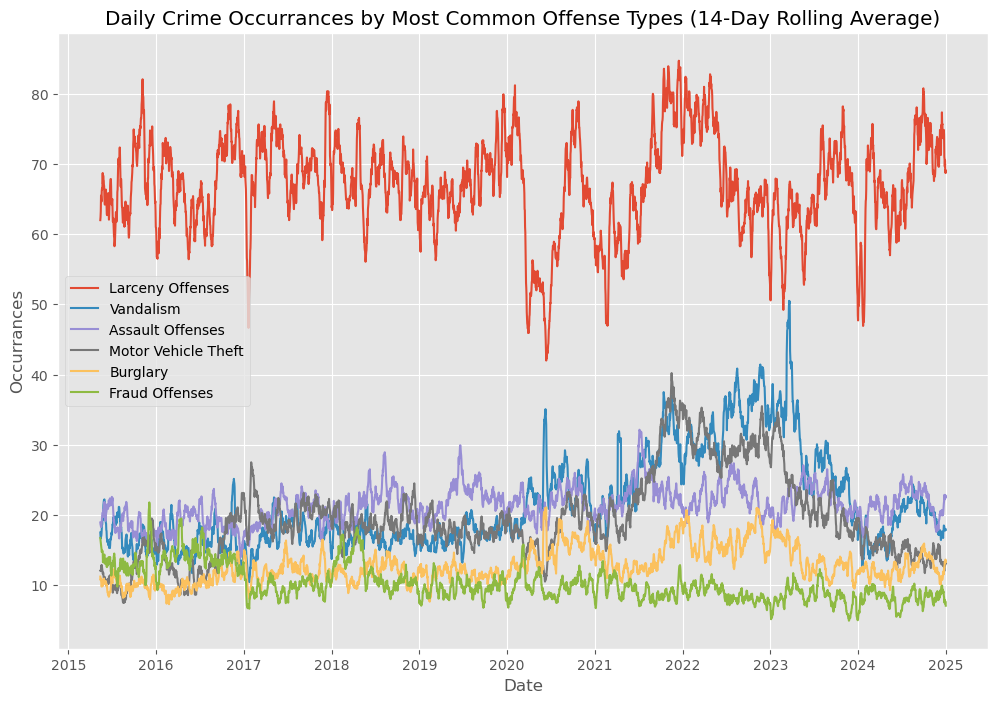

In [53]:
# A graph depictiong the breakdown of offence categories of occurred crimes per day where the total occurances > 1000 and a 14-Day Rolling Average (2015-2024)
# Note: Ignoring crimes which occurred prior to 2015
df_trimmed = df[(df['OccurDate'] >= '2015-01-01') & (df['OccurDate'] <= '2024-12-31')]
common_offenses = df_trimmed['OffenseCategory'].value_counts()[df_trimmed['OffenseCategory'].value_counts() > 30000].index.tolist()
for offense in common_offenses:
    daily_counts = df_trimmed[df_trimmed['OffenseCategory'] == offense].groupby('OccurDate').size()
    rolling_average = daily_counts.rolling(window=14).mean()
    plt.plot(rolling_average.index, rolling_average.values, label=offense)
plt.title("Daily Crime Occurrances by Most Common Offense Types (14-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Occurrances")
plt.legend()
plt.grid(True)
plt.show()

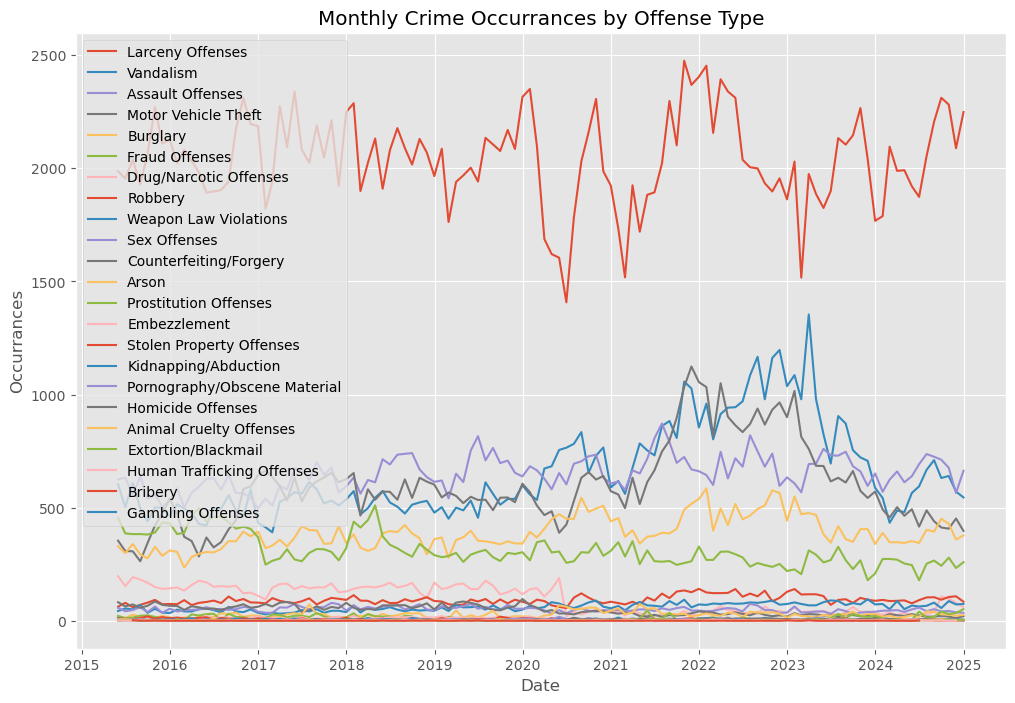

In [55]:
# A graph depictiong the breakdown of offence categories of occurred crimes per Month (2015-2024)
# Note: Ignoring crimes which occurred prior to 2015
df['OccurDate'] = pd.to_datetime(df['OccurDate'], errors='coerce')
df_trimmed = df[(df['OccurDate'] >= '2015-01-01') & (df['OccurDate'] <= '2024-12-31')]
for offense in df_trimmed['OffenseCategory'].value_counts().index:
    daily_counts = df_trimmed[df_trimmed['OffenseCategory'] == offense].groupby(pd.Grouper(key='OccurDate', freq='ME')).size()
    plt.plot(daily_counts.index, daily_counts.values, label=offense)
plt.title("Monthly Crime Occurrances by Offense Type")
plt.xlabel("Date")
plt.ylabel("Occurrances")
plt.legend()
plt.grid(True)
plt.show()

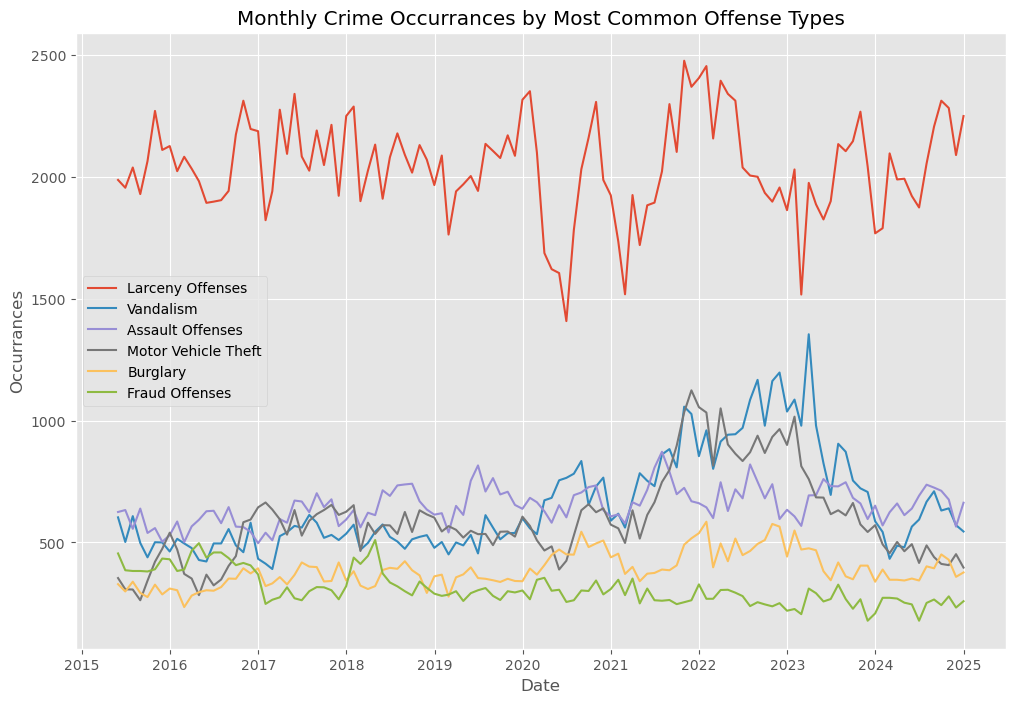

In [57]:
# A graph depictiong the breakdown of the most common offence categories of occurred crimes per Month (2015-2024)
# Note: Ignoring crimes which occurred prior to 2015
common_offenses = df_trimmed['OffenseCategory'].value_counts()[df_trimmed['OffenseCategory'].value_counts() > 30000].index
df_trimmed = df[(df['OccurDate'] >= '2015-01-01') & (df['OccurDate'] <= '2024-12-31')]
for offense in common_offenses:
    # For each category of offense, plot the Monthly amount of occurances
    daily_counts = df_trimmed[df_trimmed['OffenseCategory'] == offense].groupby(pd.Grouper(key='OccurDate', freq='ME')).size()
    plt.plot(daily_counts.index, daily_counts.values, label=offense)
plt.title("Monthly Crime Occurrances by Most Common Offense Types")
plt.xlabel("Date")
plt.ylabel("Occurrances")
plt.legend()
plt.grid(True)
plt.show()